# Regression linéaire

### Dépendances

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Lire la dataset

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Oberservation,Nom,Taille,Performance
0,1,Jacobs ( EU ),1.73,"2,32"
1,2,Noji (EU),"1,73","2,31"
2,3,Conway (EU),"1,83","2,4"
3,4,Matei (Roumanie),"1,84","2,4"
4,5,Austin (EU),"1,84","2,4"


### Supprimer les colonnes inutiles

In [4]:
data = data.drop(['Oberservation', 'Nom'], axis=1)
data.head()

,Taille,Performance
0,1.73,"2,32"
1,"1,73","2,31"
2,"1,83","2,4"
3,"1,84","2,4"
4,"1,84","2,4"


## Convertir les données pour les rendre utilisable 

### Conversion d'objet "1,73" en metre donc 173 (int)

In [5]:
def conversion_to_meter(x):
    x = x.replace(',', ".")
    return int(float(x) * 100)

In [6]:
serie_taille = data["Taille"].apply(conversion_to_meter)
serie_taille.head()

0    173
1    173
2    183
3    184
4    184
Name: Taille, dtype: int64

### Conversion d'objet "2,34" en float "2.34"

In [7]:
def conversion_comma_to_point(x):
    return float(x.replace(',', "."))

In [8]:
serie_perf = data["Performance"].apply(conversion_comma_to_point)
serie_perf.head()

0    2.32
1    2.31
2    2.40
3    2.40
4    2.40
Name: Performance, dtype: float64

### Nouvelle dataset corrigé

In [9]:
converted_data = pd.DataFrame({'Taille': serie_taille, 'Performance': serie_perf})
converted_data.head()

,Taille,Performance
0,173,2.32
1,173,2.31
2,183,2.40
3,184,2.40
4,184,2.40


### Données utiles

In [10]:
converted_data.describe()

,Taille,Performance
count,20.000000,20.00000
mean,186.750000,2.37100
std,7.489466,0.04038
min,173.000000,2.28000
25%,184.000000,2.35750
50%,185.000000,2.37000
75%,191.750000,2.40000
max,200.000000,2.45000


## Matrice X 

In [11]:
beta = converted_data['Taille'].to_numpy().reshape(20)
X = np.stack((beta, np.ones((20), dtype=int)), axis=1)
X[0:5]

array([[173,   1],
       [173,   1],
       [183,   1],
       [184,   1],
       [184,   1]])

## Matrice Y

In [12]:
Y = converted_data['Performance'].to_numpy().reshape(20, 1)
Y[0:5]

array([[2.32],
       [2.31],
       [2.4 ],
       [2.4 ],
       [2.4 ]])

## Vecteur Theta

In [13]:
np.random.seed(0)
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

## Pour pouvoir faire une regression je vais utiliser une regression linéaire avec pour modèle ax+b 

In [14]:
def model(X, theta):
    return X.dot(theta)

## Fonction de calcul d'erreur

In [15]:
def cost(X, theta, Y):
    m = len(Y)
    
    return 1/(2*m) * np.sum((model(X, theta) - Y)**2)

In [16]:
cost(X, theta, Y)

53699.55385075148

## Gradient 

In [17]:
def gradient(X, theta, Y):
    m = len(Y)
    
    return 1/m * X.T.dot(model(X, theta) - Y)

In [18]:
gradient(X, theta, Y)

array([[61248.07914312],
       [  327.46593282]])

## Descente du Gradient

In [19]:
def gradient_descent(X, theta, Y, learning_rate, n_iterations):
    cost_history = []
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X, theta, Y)
        cost_history.append(cost(X, theta, Y))
        
    return cost_history, theta

### Afficher le graphique des performances en fonction de la taille

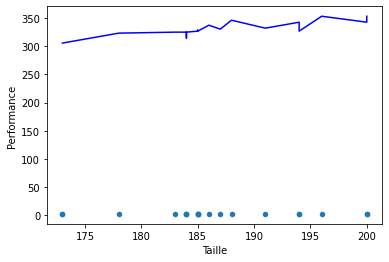

In [20]:
converted_data = converted_data.sort_values(by=['Taille'])
converted_data.plot.scatter(x='Taille', y='Performance')
plt.plot(converted_data['Taille'].to_numpy(), model(X, theta), c='b')

## Entrainement

In [21]:
cost_history, theta_final = gradient_descent(X, theta, Y, 0.1, 200)

/home/rangom/Documents/Programmation/Projets/Python/regression-linéaire/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/home/rangom/Documents/Programmation/Projets/Python/regression-linéaire/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """


In [22]:
theta_final

array([[nan],
       [nan]])

## Evolution de l'erreur

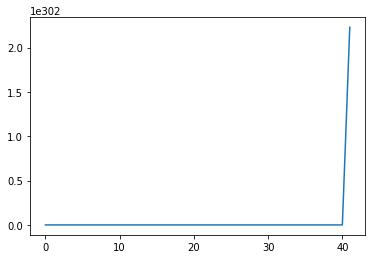

In [23]:
plt.plot(range(len(cost_history)), cost_history)

## Résultat de l'entrainement

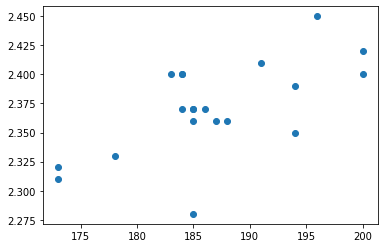

In [24]:
plt.scatter(converted_data['Taille'].to_numpy(), converted_data['Performance'].to_numpy())
plt.plot(converted_data['Taille'].to_numpy(), model(X, theta_final), c='b')

In [25]:
def coef_determination(Y, pred):
    u = ((Y - pred)**2).sum()
    v = ((Y - Y.mean())**2).sum()
    return 1 - u/v

In [26]:
coef_determination(Y, model(X, theta_final))

nan